<a href="https://colab.research.google.com/github/sergiolcrezende/Mackenzie/blob/main/trilha_4_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [75]:
bovespa = pd.read_csv('https://raw.githubusercontent.com/sergiolcrezende/Mackenzie/main/crude-oil-price.v4.csv')

display(bovespa.shape)
display('head:',bovespa.head())
display(bovespa.tail())
display(bovespa.price.value_counts())
display(bovespa.date.duplicated().sum())
display(bovespa.date.min(),bovespa.date.max())


(51, 4)

'head:'

,date,price,percentChange,change
0,2018-01-01,64.73,7.133400,4.31
1,2018-02-01,61.64,-4.773675,-3.09
2,2018-03-01,64.94,5.353666,3.30
3,2018-04-01,68.57,5.589775,3.63
4,2018-05-01,67.04,-2.231296,-1.53


,date,price,percentChange,change
46,2021-11-01,65.85,-19.479090,-15.93
47,2021-12-01,74.88,13.712984,9.03
48,2022-01-03,86.49,15.504808,11.61
49,2022-02-01,95.72,10.671754,9.23
50,2022-03-01,109.33,14.218554,13.61


64.7300     1
59.1600     1
35.4900     1
39.2700     1
40.2700     1
42.6100     1
40.2200     1
35.7900     1
45.3400     1
48.5200     1
52.2000     1
61.5000     1
63.5800     1
20.4800     1
66.9300     1
73.4700     1
73.9500     1
68.5000     1
75.0300     1
81.7800     1
65.8500     1
74.8800     1
86.4900     1
95.7200     1
18.8400     1
44.7600     1
61.6400     1
53.7900     1
64.9400     1
68.5700     1
67.0400     1
74.1500     1
68.7600     1
69.9977     1
73.5992     1
65.3100     1
50.9300     1
45.4100     1
57.2200     1
51.5600     1
60.1400     1
63.9100     1
53.5000     1
59.4601     1
58.5800     1
55.1000     1
54.0700     1
54.1800     1
55.4872     1
60.7556     1
109.3300    1
Name: price, dtype: int64

0

'2018-01-01'

'2022-03-01'

In [7]:
#display(1,bovespa.date)

In [76]:
IBOV = pd.read_csv('https://raw.githubusercontent.com/sergiolcrezende/Mackenzie/main/PETR4.dados.historicos.v3.csv')

display(IBOV.shape)
display(IBOV.head())


(1037, 7)

,data,ultimo,abertura,maxima,minima,Volume,Variacao
0,11/03/2022,32.49,33.91,34.38,32.07,92.15M,-3.59%
1,10/03/2022,33.70,32.60,34.60,32.52,136.44M,3.50%
2,09/03/2022,32.56,32.60,32.82,31.74,87.78M,0.31%
3,08/03/2022,32.46,32.00,32.97,31.51,111.63M,2.08%
4,07/03/2022,31.80,34.50,34.60,31.63,110.95M,-7.10%


In [77]:
IBOV = IBOV.rename(columns={'data': 'date'})
#IBOV = IBOV.rename_axis('data',axis='columns') # este rename é opcional 
display(1,IBOV.head())

display(IBOV.date.min(),bovespa.date.max())

1

,date,ultimo,abertura,maxima,minima,Volume,Variacao
0,11/03/2022,32.49,33.91,34.38,32.07,92.15M,-3.59%
1,10/03/2022,33.70,32.60,34.60,32.52,136.44M,3.50%
2,09/03/2022,32.56,32.60,32.82,31.74,87.78M,0.31%
3,08/03/2022,32.46,32.00,32.97,31.51,111.63M,2.08%
4,07/03/2022,31.80,34.50,34.60,31.63,110.95M,-7.10%


'01/02/2018'

'2022-03-01'

In [79]:
#display(1, bovespa.dtypes)
bovespa.date = pd.to_datetime(bovespa.date, format='%Y-%m-%d',errors='raise')
display(2, bovespa.dtypes)

2

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [80]:
#display(1, IBOV.dtypes)
#IBOV.date = pd.to_datetime(IBOV.date, format='%d-%m-%Y',errors='raise')
IBOV.date = pd.to_datetime(IBOV.date, format='%d/%m/%Y',errors='raise')
display(2, bovespa.dtypes)

2

date             datetime64[ns]
price                   float64
percentChange           float64
change                  float64
dtype: object

In [81]:
bovespa = pd.merge(bovespa, IBOV[['date','Variacao']], on='date')
display(1,bovespa.head())

1

,date,price,percentChange,change,Variacao
0,2018-02-01,61.6400,-4.773675,-3.0900,4.18%
1,2018-03-01,64.9400,5.353666,3.3000,-1.99%
2,2018-06-01,74.1500,10.605609,7.1100,-14.86%
3,2018-08-01,69.9977,1.800029,1.2377,1.42%
4,2018-10-01,65.3100,-11.262622,-8.2892,-0.39%


In [9]:
#display(1,bovespa.date)

In [82]:
print(bovespa.isnull().sum())
print(bovespa.describe())

date             0
price            0
percentChange    0
change           0
Variacao         0
dtype: int64
           price  percentChange     change
count  37.000000      37.000000  37.000000
mean   58.788511       0.578124   0.524476
std    16.457504      13.446773   7.461570
min    18.840000     -54.244861 -24.280000
25%    50.930000      -5.609012  -2.390000
50%    60.140000       5.103111   2.340000
75%    68.500000       8.996401   4.420000
max    95.720000      18.454085  11.610000


In [73]:
bovespa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36],
           dtype='int64')

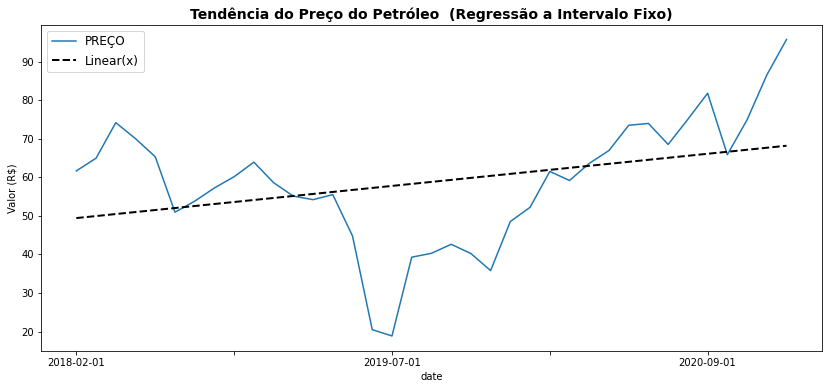

In [83]:
fig, ax = plt.subplots(figsize=(14,6))

#ax.plot(bovespa.index, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.index, bovespa.price, label='PREÇO')

#ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_title('Tendência do Preço do Petróleo  (Regressão a Intervalo Fixo)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

#z = np.polyfit(bovespa.index,bovespa.DOLAR, 1)
z = np.polyfit(bovespa.index,bovespa.price, 1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

# OU
# x = np.arange(0,len(bovespa),1)
# z = np.polyfit(x,bovespa.DOLAR, 1)
# p = np.poly1d(z)
# ax.plot(bovespa.data,p(x), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
#ax.set_xticklabels(['',bovespa.iloc[0].date.date(),'',bovespa.iloc[20].date.date(),'',bovespa.iloc[40].date.date()])
ax.set_xticklabels(['',bovespa.iloc[0].date.date(),'',bovespa.iloc[10].date.date(),'',bovespa.iloc[20].date.date()])



plt.show()

In [84]:
bovespa['dias'] = bovespa['date'] - bovespa['date'].min()
#display(1, bovespa['date'])
#display(2,bovespa['dias'])

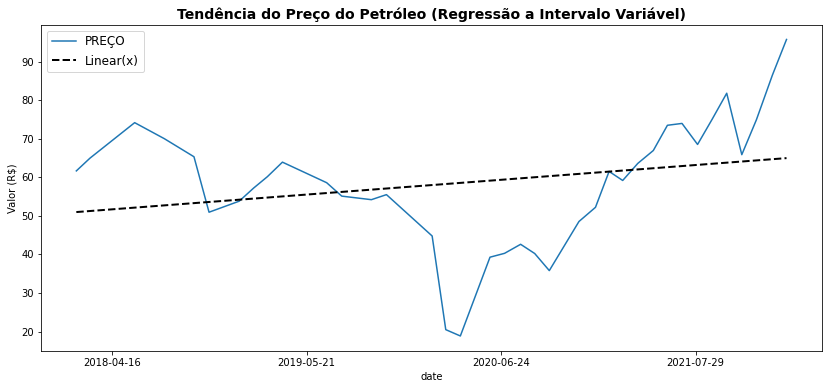

In [85]:
fig, ax = plt.subplots(figsize=(14,6))

#ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.date, bovespa.price, label='PREÇO')

#ax.set_title('Tendência do Dólar (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_title('Tendência do Preço do Petróleo (Regressão a Intervalo Variável)', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

#z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR, 1)
z = np.polyfit(bovespa.dias.dt.days,bovespa.price, 1)
p = np.poly1d(z)
#ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')
ax.plot(bovespa.date,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)' ,linewidth=2, color='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.show()

In [86]:
bovespa['week'] = bovespa['date'].dt.isocalendar().week

In [87]:
bovespa.head()

,date,price,percentChange,change,Variacao,dias,week
0,2018-02-01,61.6400,-4.773675,-3.0900,4.18%,0 days,5
1,2018-03-01,64.9400,5.353666,3.3000,-1.99%,28 days,9
2,2018-06-01,74.1500,10.605609,7.1100,-14.86%,120 days,22
3,2018-08-01,69.9977,1.800029,1.2377,1.42%,181 days,31
4,2018-10-01,65.3100,-11.262622,-8.2892,-0.39%,242 days,40


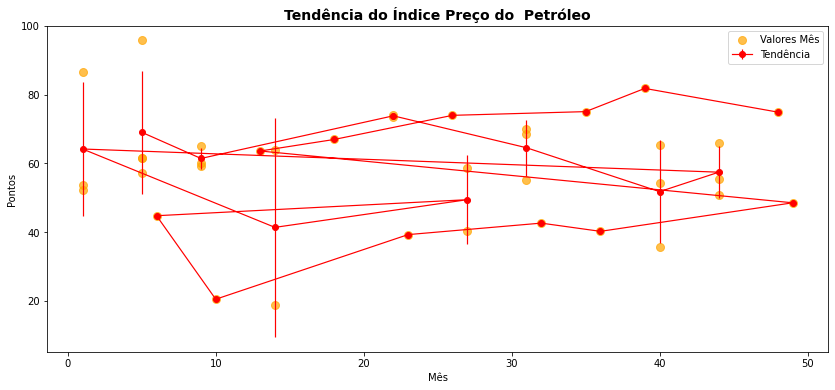

In [88]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['price'].std())
  ymean.append(bovespa[bovespa.week == w]['price'].mean())
yerr = np.array(yerr)  
ymean = np.array(ymean) 

plt.errorbar(bovespa.week.unique(), ymean, yerr=yerr, label='Tendência', marker='o', color='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.price, label='Valores Mês', marker='o', color='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Preço do  Petróleo", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

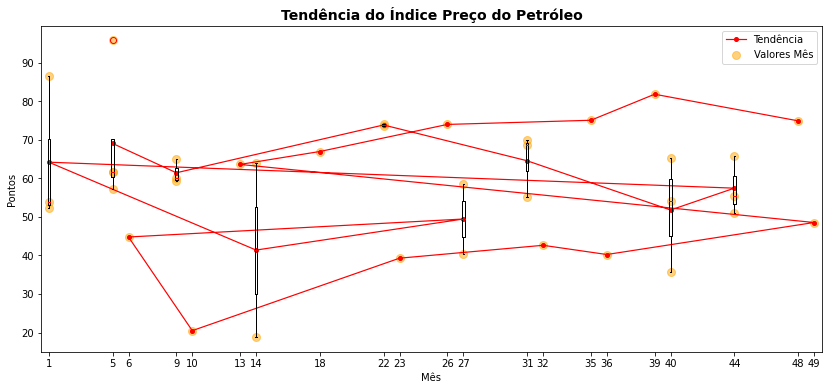

In [89]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.price, label='Valores Mês', marker='o',  alpha=0.5, s=64, color='orange')
for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].price, positions=[week], widths=0.15, flierprops=dict(color='r',markeredgecolor='r'),medianprops=dict(color='r'))

plt.title("Tendência do Índice Preço do Petróleo", fontsize=14, weight='bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

In [90]:
display('head:',bovespa.head())

'head:'

,date,price,percentChange,change,Variacao,dias,week
0,2018-02-01,61.6400,-4.773675,-3.0900,4.18%,0 days,5
1,2018-03-01,64.9400,5.353666,3.3000,-1.99%,28 days,9
2,2018-06-01,74.1500,10.605609,7.1100,-14.86%,120 days,22
3,2018-08-01,69.9977,1.800029,1.2377,1.42%,181 days,31
4,2018-10-01,65.3100,-11.262622,-8.2892,-0.39%,242 days,40


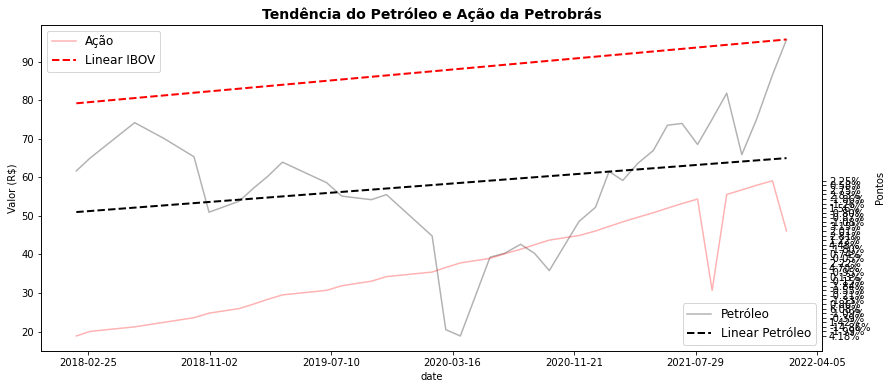

In [94]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.date, bovespa.price, label='Petróleo', color='k', alpha=0.3)

ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(bovespa.date, bovespa.Variacao, label='Ação', color='r', alpha=0.3)

ax.set_title('Tendência do Petróleo x Ação da Petrobrás', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.price, 1)
p = np.poly1d(z)
ax.plot(bovespa.date,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear Petróleo' ,linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days,bovespa.pric, 1)
p = np.poly1d(z)
ax2.plot(bovespa.date,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV' ,linewidth=2, color='r')

ax.legend(loc='lower right',fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()